In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
path = '/home/jeronimo/git/AUT-CNN-TUB/Data/Models/aws_28/model_merge_28_b100_s15064_2018-09-19_21-40/model.log'
with open(path) as f:
    f = f.readlines()

In [4]:
steps_entro_train = []
steps_ac_train = []
steps_entro_val = []
steps_ac_val = []
step = []
epoch = []
epoch_entro_test = []
epoch_ac_test = []
epoch_ac_train = []

for line in f:
    if 'step' in line:
        if 'validation cross entropy' in line:
            step.append(int(line.split('step')[1].split(',')[0]))
            steps_entro_val.append(float(line.split('validation cross entropy ')[-1][:-1]))
            
        elif 'validation accuracy' in line:
            steps_ac_val.append(float(line.split('validation accuracy ')[-1][:-1]))
            
        elif 'train accuracy' in line:
            steps_ac_train.append(float(line.split('train accuracy ')[-1][:-1]))
        elif 'train cross entropy' in line:
            steps_entro_train.append(float(line.split('train cross entropy ')[-1][:-1]))
            
            
            
            
    elif 'epoch' in line:
        if 'test accuracy' in line:    
            epoch.append(int(line.split('epoch')[1].split(',')[0]))
            epoch_ac_test.append(float(line.split('test accuracy ')[1][:-1]))
        elif 'training accuracy' in line:
            epoch_ac_train.append(float(line.split('training accuracy ')[1][:-1]))
        elif 'cross' in line:
            epoch_entro_test.append(float(line.split('cross entropy ')[-1][:-1]))

In [310]:
len(step)

11

In [311]:
len(steps_entro_val)

11

In [312]:
list(range(0,21, 4))

[0, 4, 8, 12, 16, 20]

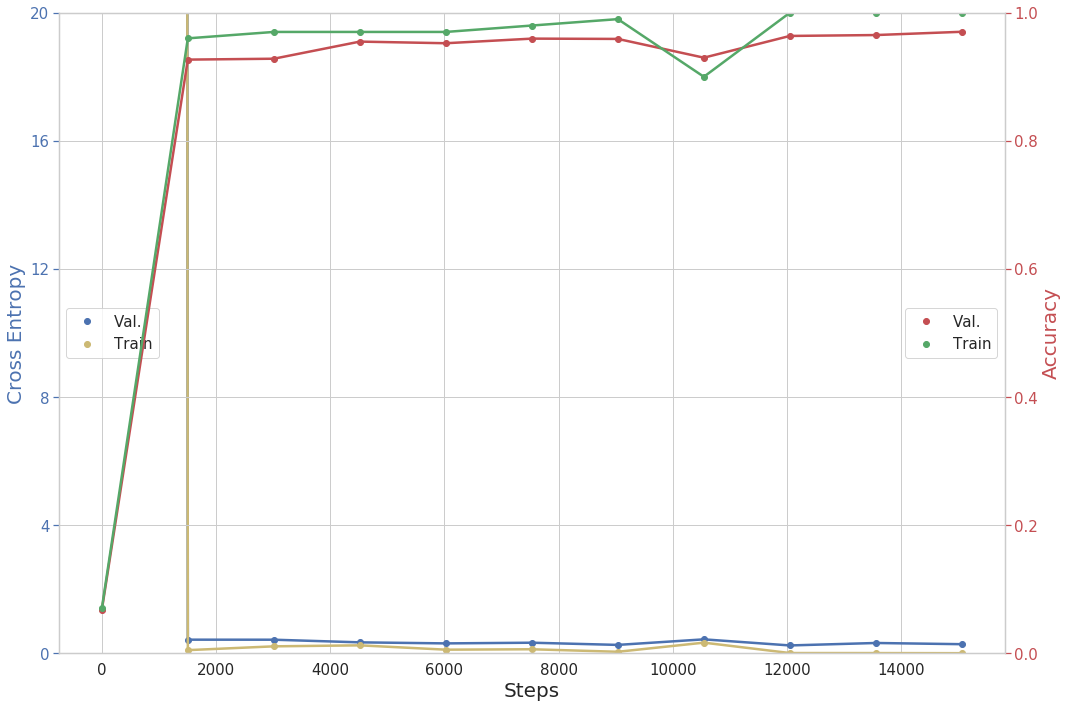

In [313]:

fig, ax1 = plt.subplots(figsize=(15,10))

ax1.plot(step, steps_entro_val, 'bo', label='Val.' )
ax1.plot(step, steps_entro_val, 'b', lw= 2.5)
ax1.plot(step, steps_entro_train, 'yo', label='Train')
ax1.plot(step, steps_entro_train, 'y',  lw= 2.5)
ax1.set_ylim([0,20])
ax1.set_yticks(list(range(0,21, 4)))
#ax1.set_yscale('symlog')
ax1.set_xlabel('Steps').set_fontsize(20)
ax1.tick_params('x', labelsize=15)

ax1.legend(loc=6, fontsize=15)

# Make the y-axis label, ticks and tick labels match the line color.

ax1.set_ylabel('Cross Entropy', color='b').set_fontsize(20)
ax1.tick_params('y', colors='b', labelsize=15)
#ax1.set_yticks([10,5,1,0.5])


ax2 = ax1.twinx()
ax2.set_ylim([0,1])
#ax2.set_yscale('log')
ax2.plot(step, steps_ac_val, 'ro', label='Val.')
ax2.plot(step, steps_ac_val, 'r', lw= 2.5)

ax2.plot(step, steps_ac_train, 'go', label='Train')
ax2.plot(step, steps_ac_train, 'g',  lw= 2.5)
ax2.set_ylabel('Accuracy', color='r').set_fontsize(20)

ax2.tick_params('y', colors='r', labelsize=15)

ax2.legend(loc=7, fontsize=15)
fig.tight_layout()
plt.savefig(path.split('model.log')[0]+'graph')
plt.show()

In [314]:
# start
f[0].split(' - root - ')[0]

'2018-09-19 21:40:49,840'

In [278]:
# end
for r in f:
    if '- root - INFO - test accuracy' in r:
        print(r.split(' - root - ')[0])

2018-09-19 20:31:57,753


In [279]:
# traingsduration in min
float(f[-1].split('Model training tock, ')[1].split(' secondes\n')[0])/60

16.086084087689716

In [280]:
f[0].split('MINIBATCH_SIZE: ')[1].split(',')[0]

'100'

In [281]:
f[0].split('STEPS: ')[1].split(',')[0]

'1506'

In [282]:
f[0].split('PIXEL: ')[1].split(',')[0]

'28'

In [283]:
f[0].split('COLOR: ')[1].split(',')[0]

'3'

In [284]:
f[0].split('CONV: ')[1].split(',')[0]

'5'

In [285]:
f[0].split('DROP_KEEP: ')[1].split(',')[0]

'0.9'

In [286]:
f[0].split('LEARNING: ')[1].split('\n')[0]

'0.001, CONV1_DEPTH:64'

In [287]:
f[0]

'2018-09-19 20:15:52,806 - root - INFO - MINIBATCH_SIZE: 100, STEPS: 1506, PIXEL: 28, COLOR: 3, CONV: 5, DROP_KEEP: 0.9, EPOCH: 5.0, LEARNING: 0.001, CONV1_DEPTH:64\n'

In [5]:
f[-1]

'2018-09-19 23:57:30,368 - root - INFO - Model training tock, 8200.552623271942 secondes\n'

In [7]:
8200/60/60

2.2777777777777777